<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W4(Exersice)_28_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c236bd9d38891d490bfe8c4edbed3b6a6ddc9703893f06ccad71d9c131fc2be9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


8.299999999999999


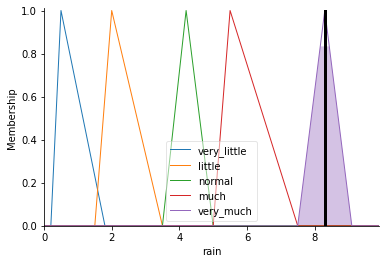

In [4]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

#Exercise about predict the rainfall

#wind speed as ws
ws = ctrl.Antecedent(np.arange(0.5, 4, 0.1), 'ws')
#temperature C as temp
temp = ctrl.Antecedent(np.arange(20, 42, 0.1), 'temp')
#rainfall as rain
rain = ctrl.Consequent(np.arange(0, 10, 0.1), 'rain')

ws['very_low'] = fuzz.trimf(ws.universe, [0.7,0.7,1])
ws['low'] = fuzz.trimf(ws.universe, [0.8,1,1.2])
ws['normal'] = fuzz.trimf(ws.universe, [1.2,1.3,1.5])
ws['high'] = fuzz.trimf(ws.universe, [1.5,2,2.3])
ws['very_high'] = fuzz.trimf(ws.universe, [2.3,3,3.1])

temp['very_low'] = fuzz.trimf(temp.universe, [20.4,20.4,22])
temp['low'] = fuzz.trimf(temp.universe, [22,23,25])
temp['normal'] = fuzz.trimf(temp.universe, [24,25,27])
temp['high'] = fuzz.trimf(temp.universe, [27,29,35])
temp['very_high'] = fuzz.trimf(temp.universe, [30,35,41.2])

rain['very_little'] = fuzz.trimf(rain.universe, [0.2,0.5,1.8])
rain['little'] = fuzz.trimf(rain.universe, [1.5,2.0,3.5])
rain['normal'] = fuzz.trimf(rain.universe, [3.5,4.2,5.0])
rain['much'] = fuzz.trimf(rain.universe, [5.0,5.5,7.5])
rain['very_much'] =  fuzz.trimf(rain.universe, [7.5,8.3,9.1])

# ws.view()
# temp.view()
# rain.view()
# ws['high'].view()

#rule
rule1 = ctrl.Rule(ws['very_low']&temp['very_low'],rain['very_little'])
rule2 = ctrl.Rule(ws['very_low']&temp['low'],rain['very_little'])
rule3 = ctrl.Rule(ws['very_low']&temp['normal'],rain['little'])
rule4 = ctrl.Rule(ws['very_low']&temp['high'],rain['normal'])
rule5 = ctrl.Rule(ws['very_low']&temp['very_high'],rain['much'])

rule6 = ctrl.Rule(ws['low']&temp['very_low'],rain['very_little'])
rule7 = ctrl.Rule(ws['low']&temp['low'],rain['little'])
rule8 = ctrl.Rule(ws['low']&temp['normal'],rain['normal'])
rule9 = ctrl.Rule(ws['low']&temp['high'],rain['normal'])
rule10 = ctrl.Rule(ws['low']&temp['very_high'],rain['very_much'])

rule11 = ctrl.Rule(ws['normal']&temp['very_low'],rain['little'])
rule12 = ctrl.Rule(ws['normal']&temp['low'],rain['little'])
rule13 = ctrl.Rule(ws['normal']&temp['normal'],rain['normal'])
rule14 = ctrl.Rule(ws['normal']&temp['high'],rain['much'])
rule15 = ctrl.Rule(ws['normal']&temp['very_high'],rain['very_much'])

rule16 = ctrl.Rule(ws['high']&temp['very_low'],rain['normal'])
rule17 = ctrl.Rule(ws['high']&temp['low'],rain['much'])
rule18 = ctrl.Rule(ws['high']&temp['normal'],rain['much'])
rule19 = ctrl.Rule(ws['high']&temp['high'],rain['very_much'])
rule20 = ctrl.Rule(ws['high']&temp['very_high'],rain['very_much'])

rule21 = ctrl.Rule(ws['very_high']&temp['very_low'],rain['normal'])
rule22 = ctrl.Rule(ws['very_high']&temp['low'],rain['normal'])
rule23 = ctrl.Rule(ws['very_high']&temp['normal'],rain['much'])
rule24 = ctrl.Rule(ws['very_high']&temp['high'],rain['very_much'])
rule25 = ctrl.Rule(ws['very_high']&temp['very_high'],rain['very_much'])

rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                rule8,rule9,rule10,rule11,rule12,rule13,rule14,
                                rule15,rule16,rule17,rule18,rule19,rule20,rule21,
                                rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(rain_ctrl)

raining.input['ws'] = 3
raining.input['temp'] = 30
raining.compute()

print(raining.output['rain'])
rain.view(sim=raining)

0.1349206349206349


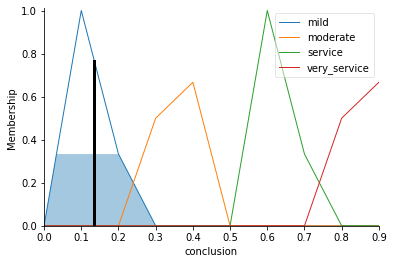

In [5]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

#Exercise about Medical Diagnosis 

# 11 input: "fever" "headache" "nausea" "vomiting" "jaundice"
#  " enlarge liver" "joint pain" "body weakness" "dizziness"
#  "loss of appetite" "MP" 
# 1 output: "conclusion"
fever = ctrl.Antecedent(np.arange(0,1.1,0.1), 'fever')
headache = ctrl.Antecedent(np.arange(0,1.1,0.1), 'headache')
nausea = ctrl.Antecedent(np.arange(0,1.1,0.1), 'nausea')
vomiting = ctrl.Antecedent(np.arange(0,1.1,0.1), 'vomiting')
jaundice = ctrl.Antecedent(np.arange(0,1.1,0.1), 'jaundice')
enlarge_liver = ctrl.Antecedent(np.arange(0,1.1,0.1), 'enlarge_liver')
joint_pain = ctrl.Antecedent(np.arange(0,1.1,0.1), 'joint_pain')
body_weakness = ctrl.Antecedent(np.arange(0,1.1,0.1), 'body_weakness')
dizziness = ctrl.Antecedent(np.arange(0,1.1,0.1), 'dizziness')
#loss of appetite: loa
loa = ctrl.Antecedent(np.arange(0,1.1,0.1), 'loa')
mp = ctrl.Antecedent(np.arange(0,1.1,0.1), 'mp')

conclusion = ctrl.Consequent(np.arange(0,1,0.1), 'conclusion')
# 4 levels:  "mild" "moderate" "service" "very service"
fever['mild'] = fuzz.trimf(fever.universe, [0,0.1,0.25])
fever['moderate'] = fuzz.trimf(fever.universe, [0.25,0.35,0.5])
fever['service'] = fuzz.trimf(fever.universe, [0.5,0.6,0.75])
fever['very_service'] = fuzz.trimf(fever.universe, [0.75,0.85,1])

headache['mild'] = fuzz.trimf(headache.universe, [0,0.1,0.25])
headache['moderate'] = fuzz.trimf(headache.universe, [0.25,0.35,0.5])
headache['service'] = fuzz.trimf(headache.universe, [0.5,0.6,0.75])
headache['very_service'] = fuzz.trimf(headache.universe, [0.75,0.85,1])

nausea['mild'] = fuzz.trimf(nausea.universe, [0,0.1,0.25])
nausea['moderate'] = fuzz.trimf(nausea.universe, [0.25,0.35,0.5])
nausea['service'] = fuzz.trimf(nausea.universe, [0.5,0.6,0.75])
nausea['very_service'] = fuzz.trimf(nausea.universe, [0.75,0.85,1])

vomiting['mild'] = fuzz.trimf(vomiting.universe, [0,0.1,0.25])
vomiting['moderate'] = fuzz.trimf(vomiting.universe, [0.25,0.35,0.5])
vomiting['service'] = fuzz.trimf(vomiting.universe, [0.5,0.6,0.75])
vomiting['very_service'] = fuzz.trimf(vomiting.universe, [0.75,0.85,1])

jaundice['mild'] = fuzz.trimf(jaundice.universe, [0,0.1,0.25])
jaundice['moderate'] = fuzz.trimf(jaundice.universe, [0.25,0.35,0.5])
jaundice['service'] = fuzz.trimf(jaundice.universe, [0.5,0.6,0.75])
jaundice['very_service'] = fuzz.trimf(jaundice.universe, [0.75,0.85,1])

enlarge_liver['mild'] = fuzz.trimf(enlarge_liver.universe, [0,0.1,0.25])
enlarge_liver['moderate'] = fuzz.trimf(enlarge_liver.universe, [0.25,0.35,0.5])
enlarge_liver['service'] = fuzz.trimf(enlarge_liver.universe, [0.5,0.6,0.75])
enlarge_liver['very_service'] = fuzz.trimf(enlarge_liver.universe, [0.75,0.85,1])

joint_pain['mild'] = fuzz.trimf(joint_pain.universe, [0,0.1,0.25])
joint_pain['moderate'] = fuzz.trimf(joint_pain.universe, [0.25,0.35,0.5])
joint_pain['service'] = fuzz.trimf(joint_pain.universe, [0.5,0.6,0.75])
joint_pain['very_service'] = fuzz.trimf(joint_pain.universe, [0.75,0.85,1])

body_weakness['mild'] = fuzz.trimf(body_weakness.universe, [0,0.1,0.25])
body_weakness['moderate'] = fuzz.trimf(body_weakness.universe, [0.25,0.35,0.5])
body_weakness['service'] = fuzz.trimf(body_weakness.universe, [0.5,0.6,0.75])
body_weakness['very_service'] = fuzz.trimf(body_weakness.universe, [0.75,0.85,1])

dizziness['mild'] = fuzz.trimf(dizziness.universe, [0,0.1,0.25])
dizziness['moderate'] = fuzz.trimf(dizziness.universe, [0.25,0.35,0.5])
dizziness['service'] = fuzz.trimf(dizziness.universe, [0.5,0.6,0.75])
dizziness['very_service'] = fuzz.trimf(dizziness.universe, [0.75,0.85,1])

loa['mild'] = fuzz.trimf(loa.universe, [0,0.1,0.25])
loa['moderate'] = fuzz.trimf(loa.universe, [0.25,0.35,0.5])
loa['service'] = fuzz.trimf(loa.universe, [0.5,0.6,0.75])
loa['very_service'] = fuzz.trimf(loa.universe, [0.75,0.85,1])

mp['mild'] = fuzz.trimf(mp.universe, [0,0.1,0.25])
mp['moderate'] = fuzz.trimf(mp.universe, [0.25,0.35,0.5])
mp['service'] = fuzz.trimf(mp.universe, [0.5,0.6,0.75])
mp['very_service'] = fuzz.trimf(mp.universe, [0.75,0.85,1])

conclusion['mild'] = fuzz.trimf(conclusion.universe, [0,0.1,0.25])
conclusion['moderate'] = fuzz.trimf(conclusion.universe, [0.25,0.35,0.5])
conclusion['service'] = fuzz.trimf(conclusion.universe, [0.5,0.6,0.75])
conclusion['very_service'] = fuzz.trimf(conclusion.universe, [0.75,0.85,1])

rule1 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizziness['service']&loa['mild']&mp['mild'],conclusion['mild'])
rule2 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['service']&loa['service']&mp['moderate'],conclusion['moderate'])
rule3 = ctrl.Rule(fever['service']&headache['moderate']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['service']&dizziness['service']&loa['service']&mp['moderate'],conclusion['service'])
rule4 = ctrl.Rule(fever['very_service']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['service']&body_weakness['service']&dizziness['service']&loa['mild']&mp['service'],conclusion['very_service'])

rule5 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loa['service']&mp['moderate'],conclusion['moderate'])
rule6 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizziness['moderate']&loa['mild']&mp['mild'],conclusion['mild'])
rule7 = ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['service']&body_weakness['service']&dizziness['moderate']&loa['moderate']&mp['moderate'],conclusion['service'])
rule8 = ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['moderate']&enlarge_liver['moderate']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loa['moderate']&mp['moderate'],conclusion['moderate'])

rule9 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['service']&joint_pain['moderate']&body_weakness['moderate']&dizziness['service']&loa['moderate']&mp['moderate'],conclusion['moderate'])
rule10 = ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['mild']&dizziness['mild']&loa['mild']&mp['mild'],conclusion['mild'])
rule11 = ctrl.Rule(fever['service']&headache['service']&nausea['service']&vomiting['service']&jaundice['service']&enlarge_liver['service']&joint_pain['service']&body_weakness['very_service']&dizziness['service']&loa['service']&mp['moderate'],conclusion['very_service'])
rule12 = ctrl.Rule(fever['moderate']&headache['service']&nausea['moderate']&vomiting['service']&jaundice['moderate']&enlarge_liver['service']&joint_pain['moderate']&body_weakness['service']&dizziness['moderate']&loa['mild']&mp['moderate'],conclusion['service'])

rule13 = ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['moderate']&dizziness['mild']&loa['moderate']&mp['moderate'],conclusion['moderate'])
rule14 = ctrl.Rule(fever['service']&headache['service']&nausea['moderate']&vomiting['service']&jaundice['service']&enlarge_liver['service']&joint_pain['service']&body_weakness['service']&dizziness['moderate']&loa['moderate']&mp['service'],conclusion['service'])
rule15 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['service']&dizziness['mild']&loa['service']&mp['moderate'],conclusion['service'])
rule16 = ctrl.Rule(fever['very_service']&headache['moderate']&nausea['mild']&vomiting['moderate']&jaundice['service']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['very_service']&dizziness['service']&loa['mild']&mp['moderate'],conclusion['very_service'])

rule17 = ctrl.Rule(fever['mild']&headache['very_service']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['moderate']&dizziness['very_service']&loa['mild']&mp['moderate'],conclusion['very_service'])
rule18 = ctrl.Rule(fever['moderate']&headache['very_service']&nausea['very_service']&vomiting['mild']&jaundice['service']&enlarge_liver['service']&joint_pain['moderate']&body_weakness['service']&dizziness['very_service']&loa['very_service']&mp['service'],conclusion['very_service'])
rule19 = ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&loa['mild']&mp['moderate'],conclusion['moderate'])
rule20 = ctrl.Rule(fever['very_service']&headache['service']&nausea['service']&vomiting['service']&jaundice['service']&enlarge_liver['service']&joint_pain['service']&body_weakness['service']&dizziness['service']&loa['mild']&mp['moderate'],conclusion['very_service'])

conclusion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
conclusioning = ctrl.ControlSystemSimulation(conclusion_ctrl)

conclusioning.input['fever'] = 0.2
conclusioning.input['headache'] = 0.2
conclusioning.input['nausea'] = 0.2
conclusioning.input['vomiting'] = 0.2
conclusioning.input['jaundice'] = 0.2
conclusioning.input['enlarge_liver'] = 0.2
conclusioning.input['joint_pain'] = 0.2
conclusioning.input['body_weakness'] = 0.2
conclusioning.input['dizziness'] = 0.6
conclusioning.input['loa'] = 0.2
conclusioning.input['mp'] = 0.2

conclusioning.compute()

print(conclusioning.output['conclusion'])

conclusion.view(sim=conclusioning)